In [79]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import os

In [50]:
def load_and_preprocess_imgs(save_folder):
    imgs = []
    files = [file for file in os.listdir(save_folder) if file.endswith('png')]
    for file in files:
        img_path = os.path.join(save_folder, file)
        img = image.load_img(img_path, target_size=(224, 224))
        imgs.append(image.img_to_array(img))
    
    return preprocess_input(np.asarray(imgs))

In [91]:
X = load_images('../data/image_dataset')
df = pd.read_csv('../data/image_dataset/data.csv', index_col=0)
labels = df['shape'].as_matrix()
nb_samples = X.shape[0]

In [61]:
X.shape

(20, 224, 224, 3)

In [55]:
# x = image.img_to_array(img)
# print(x.shape)
# x = np.expand_dims(x, axis=0)
# print(x.shape)

In [62]:
model = VGG16(weights='imagenet', include_top=False)

In [63]:
X_h = model.predict(X)
X_h = X_h.reshape(nb_samples,-1)

In [64]:
X_h.shape

(20, 25088)

In [65]:
from scipy.spatial.distance import cosine

def similarity(x1, x2):
    return 1 - cosine(x1, x2)

In [66]:
similarity(X_h[0], X_h[1])

0.62544033557873402

In [75]:
def evaluate(X, i):
    """
    :param X: The (nb_samples, nb_features) feature matrix.
    :param i: The index of the sample we want to compare to others.
    """
    candidates = list(range(len(X)))
    candidates.remove(i)
    for j in candidates:
        print('%0.2i: %0.3f' % (j, similarity(X[i], X[j])))

In [93]:
def evaluate(X, y):
    max_in = 0
    for i, cat in enumerate(y):
        # Find indices of other samples with same category
        inds_same = np.where(y == cat)[0]
        vals_same = [similarity(X[i], X[j]) for j in inds_same]
        # Find indices of other samples with different category
        inds_diff = np.where(y != cat)[0]
        vals_diff = [similarity(X[i], X[j]) for j in inds_diff]
        if max(vals_same) > max(vals_diff):
            max_in += 1
            
    return max_in / len(X)

In [94]:
evaluate1(X_h, labels)

1.0

# Plot images side by side for the github wiki

In [98]:
from scipy.ndimage import imread

imgs = np.asarray(
    [imread(os.path.join('../data/image_dataset', 'img%0.4i.png' % i)) 
     for i in range(20)]
)

In [100]:
imgs.shape

(20, 400, 400, 4)

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

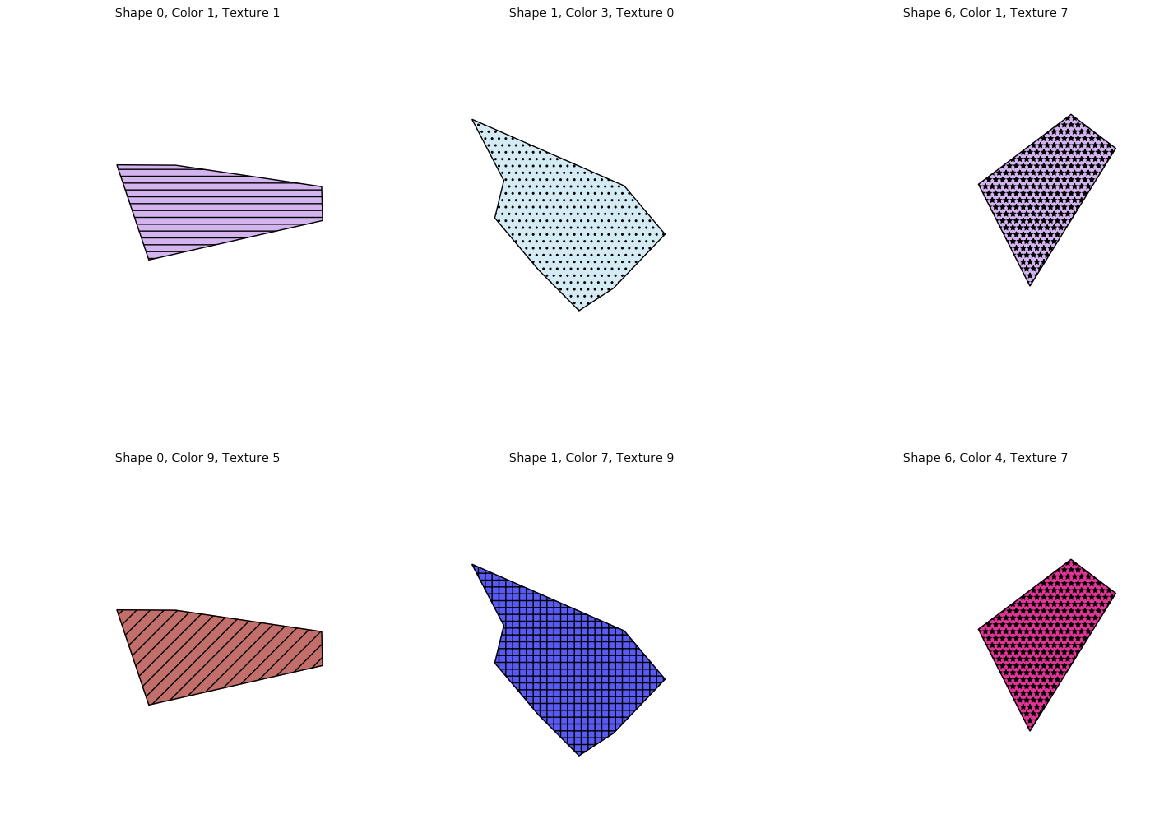

In [141]:
f, ax = plt.subplots(2, 3, figsize=(20,15))
ax[0,0].imshow(imgs[0])
ax[0,1].imshow(imgs[2])
ax[0,2].imshow(imgs[12])
ax[1,0].imshow(imgs[1])
ax[1,1].imshow(imgs[3])
ax[1,2].imshow(imgs[13])
ax[0,0].title.set_text('Shape 0, Color 1, Texture 1')
ax[0,1].title.set_text('Shape 1, Color 3, Texture 0')
ax[0,2].title.set_text('Shape 6, Color 1, Texture 7')
ax[1,0].title.set_text('Shape 0, Color 9, Texture 5')
ax[1,1].title.set_text('Shape 1, Color 7, Texture 9')
ax[1,2].title.set_text('Shape 6, Color 4, Texture 7')
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
f.savefig('../data/image_dataset/examples.png')

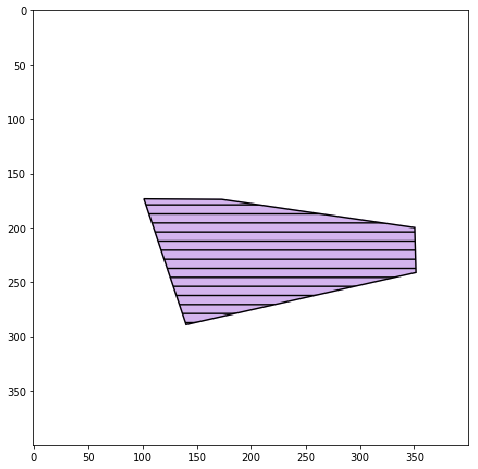

In [112]:
plt.figure(figsize=(8, 8))
plt.imshow(imgs[0])
plt.show()